In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from pandas.api.types import is_numeric_dtype

In [2]:
SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 18

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [3]:
dataset = pd.read_csv('G:/data/HousePrices/train.csv').drop(['Id'], axis=1)
y_train = dataset['SalePrice']
X_train = dataset.drop(['SalePrice'], axis=1).copy()
id_for_pred = pd.read_csv('G:/data/HousePrices/test.csv')['Id']
for_prediction_dataset = pd.read_csv('G:/data/HousePrices/test.csv').drop(['Id'], axis=1)
submission = pd.read_csv('G:/data/HousePrices/sample_submission.csv')

In [4]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [5]:
X_train['Utilities'].unique()

array(['AllPub', 'NoSeWa'], dtype=object)

In [6]:
for_prediction_dataset

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


# Feature engineering

In [7]:
features_replacement = {}

In [8]:
features_cat = [feature for feature in dataset.columns if not is_numeric_dtype(dataset[feature])]
for feature in features_cat:
    unique_numbers = X_train[feature].unique()
    features_replacement[feature] = (unique_numbers, np.linspace(0.1, round(0.1 + len(unique_numbers)/10, 2), num=len(unique_numbers)))
    X_train[feature].replace(features_replacement[feature][0],
                                    features_replacement[feature][1], inplace=True)

In [9]:
features_year = [feature for feature in dataset.columns if 'Year' in feature]
features_year.append('YrSold')
features_year.append('GarageYrBlt')
for feature in features_year:
    unique_numbers = X_train[feature].unique()
    features_replacement[feature] = (np.sort(unique_numbers), np.arange(0.1, round(len(unique_numbers)/10 + 0.1, 2), 0.1))
    X_train[feature].replace(features_replacement[feature][0],
                                    features_replacement[feature][1], inplace=True)

In [10]:
for feature_name, replacement in features_replacement.items():
    for_prediction_dataset[feature_name].replace(replacement[0], replacement[1], inplace=True)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.15, random_state=42, shuffle=True)

In [12]:
def check_missing_values_num(dataset):
    features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0 and is_numeric_dtype(dataset[feature])]
    for feature in features_nan:
        print(f"{feature}: {np.round(dataset[feature].isnull().mean(), 4)}% missing values")
    return features_nan

def replace_missing_values_num(dataset):
    features_nan = [feature for feature in dataset.columns if dataset[feature].isnull().sum() > 0 and is_numeric_dtype(dataset[feature])]
    for feature in features_nan:
        dataset[feature] = dataset[feature].fillna(dataset[feature].median())

In [13]:
replace_missing_values_num(X_train)
replace_missing_values_num(X_test)
replace_missing_values_num(for_prediction_dataset)

In [14]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
984,90,0.100,75.0,10125,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0,0,0.1,0.100,0.1,0,8,0.4,0.325,0.10
777,20,0.100,100.0,13350,0.1,0.1,0.233333,0.100000,0.1,0.10,...,0,0,0.1,0.225,0.1,0,6,0.1,0.100,0.10
707,120,0.100,48.0,6240,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0,0,0.1,0.100,0.1,0,12,0.4,0.100,0.10
598,20,0.100,80.0,12984,0.1,0.1,0.100000,0.233333,0.1,0.10,...,0,0,0.1,0.100,0.1,0,3,0.1,0.100,0.10
874,50,0.225,52.0,5720,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0,0,0.1,0.100,0.1,0,8,0.4,0.100,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,20,0.100,78.0,9317,0.1,0.1,0.233333,0.100000,0.1,0.10,...,0,0,0.1,0.100,0.1,0,3,0.2,0.100,0.10
1130,50,0.100,65.0,7804,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0,0,0.1,0.225,0.1,0,12,0.4,0.100,0.10
1294,20,0.100,60.0,8172,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0,0,0.1,0.100,0.1,0,4,0.1,0.100,0.10
860,50,0.100,55.0,7642,0.1,0.1,0.100000,0.100000,0.1,0.35,...,0,0,0.1,0.475,0.1,0,6,0.2,0.100,0.10


In [15]:
features_num = [feature for feature in X_train.columns if (is_numeric_dtype(X_train[feature]) and feature not in features_year and feature not in features_cat)]
X_train[features_num] = normalize(X_train[features_num], norm='l1', axis=0)
X_test[features_num] = normalize(X_test[features_num], norm='l1', axis=0)
for_prediction_dataset[features_num] = normalize(for_prediction_dataset[features_num], norm='l1', axis=0)

In [16]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
984,0.001270,0.100,0.000863,0.000768,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.001016,0.4,0.325,0.10
777,0.000282,0.100,0.001150,0.001013,0.1,0.1,0.233333,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.225,0.1,0.0,0.000762,0.1,0.100,0.10
707,0.001693,0.100,0.000552,0.000474,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.001524,0.4,0.100,0.10
598,0.000282,0.100,0.000920,0.000985,0.1,0.1,0.100000,0.233333,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.000381,0.1,0.100,0.10
874,0.000705,0.225,0.000598,0.000434,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.001016,0.4,0.100,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1095,0.000282,0.100,0.000897,0.000707,0.1,0.1,0.233333,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.000381,0.2,0.100,0.10
1130,0.000705,0.100,0.000748,0.000592,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.225,0.1,0.0,0.001524,0.4,0.100,0.10
1294,0.000282,0.100,0.000690,0.000620,0.1,0.1,0.100000,0.100000,0.1,0.10,...,0.0,0.0,0.1,0.100,0.1,0.0,0.000508,0.1,0.100,0.10
860,0.000705,0.100,0.000633,0.000580,0.1,0.1,0.100000,0.100000,0.1,0.35,...,0.0,0.0,0.1,0.475,0.1,0.0,0.000762,0.2,0.100,0.10


In [17]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
892,0.001641,0.100,0.004576,0.003867,0.1,0.10,0.100000,0.100000,0.1,0.100,...,0.0,0.0,0.1,0.225,0.1,0.0,0.001477,0.1,0.1000,0.10
1105,0.004924,0.100,0.006406,0.005632,0.1,0.10,0.233333,0.100000,0.1,0.350,...,0.0,0.0,0.1,0.100,0.1,0.0,0.002954,0.5,0.1000,0.10
413,0.002462,0.225,0.003661,0.004117,0.1,0.25,0.100000,0.100000,0.1,0.100,...,0.0,0.0,0.1,0.100,0.1,0.0,0.002216,0.5,0.1000,0.10
522,0.004103,0.225,0.003269,0.002298,0.1,0.10,0.100000,0.100000,0.1,0.350,...,0.0,0.0,0.1,0.100,0.1,0.0,0.007386,0.1,0.1000,0.10
1036,0.001641,0.100,0.005818,0.005927,0.1,0.10,0.233333,0.500000,0.1,0.100,...,0.0,0.0,0.1,0.100,0.1,0.0,0.006647,0.4,0.1000,0.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,0.001641,0.100,0.004772,0.017970,0.1,0.10,0.233333,0.366667,0.1,0.475,...,0.0,0.0,0.1,0.100,0.1,0.0,0.002954,0.3,0.1000,0.10
240,0.001641,0.475,0.004903,0.004136,0.1,0.10,0.100000,0.100000,0.1,0.100,...,0.0,0.0,0.1,0.100,0.1,0.0,0.002954,0.5,0.1000,0.10
597,0.009848,0.100,0.003465,0.001802,0.1,0.10,0.100000,0.100000,0.1,0.100,...,0.0,0.0,0.1,0.100,0.1,0.0,0.001477,0.2,0.2125,0.34
946,0.006565,0.100,0.004576,0.003751,0.1,0.10,0.100000,0.100000,0.1,0.100,...,0.0,0.0,0.1,0.100,0.1,0.0,0.002216,0.1,0.1000,0.10


# Model training

## imports

In [18]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, Dataset

torch.manual_seed(42)
torch.cuda.manual_seed(42)

## Neural net class

In [19]:
class NN(nn.Module):
    def __init__(self, input_size):
        super(NN, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)
        self.fc2 = nn.Linear(16, 8)
        self.fc3 = nn.Linear(8, 8)
        self.do1 = nn.Dropout(0.2)
        self.fc4 = nn.Linear(8, 8)
        self.do2 = nn.Dropout(0.2)
        self.fc5 = nn.Linear(8, 8)
        self.do3 = nn.Dropout(0.2)
        self.fc6 = nn.Linear(8, 8)
        self.fc7 = nn.Linear(8, 8)
        self.fc8 = nn.Linear(8, 4)
        self.fc9 = nn.Linear(4, 1)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = self.do1(x)
        x = F.relu(self.fc4(x))
        x = self.do2(x)
        x = F.relu(self.fc5(x))
        x = self.do3(x)
        x = F.relu(self.fc6(x))
        x = F.relu(self.fc7(x))
        x = F.relu(self.fc8(x))
        x = self.fc9(x)
        return x

## Dataset class

In [20]:
class MyDataset(Dataset):
    def __init__(self, X, y):
        self.X=torch.tensor(X.values,dtype=torch.float32)
        self.y=torch.tensor(y.values,dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx],self.y[idx]

## Function for testing

In [21]:
def evaluate(dataloader, model):
    loss = 0
    data_size = 0
    with torch.no_grad():
        for data, labels in dataloader:
            data = data.to(device=device)
            labels = labels.view(labels.size(0), -1).to(device=device)
            outputs = model(data)
            loss += criterion(outputs, labels)
            data_size += len(data)
    return torch.sqrt(loss/data_size)

## Set device

In [22]:
device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


## Hyperparameters

In [23]:
input_size = len(X_train.columns)
learning_rate = 0.001
batch_size = 200
n_epochs = 15000

## Load data

In [24]:
train = MyDataset(X_train, y_train)
test = MyDataset(X_test, y_test)
train_loader = DataLoader(dataset=train,
                          batch_size=batch_size
                          )
test_loader = DataLoader(dataset=test,
                         batch_size=batch_size
                         )

## Initialize network

In [25]:
model = NN(input_size=input_size).to(device)

## Loss and optimizer

In [26]:
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

## Train Network

In [27]:
global_train_loss = []
test_loss = []
for epoch in range(n_epochs):
    loss_sum = 0

    for batch_idx, (data, targets) in enumerate(train_loader):
        # data to cuda
        data = data.to(device=device)
        targets = targets.view(targets.size(0), -1).to(device=device)

        optimizer.zero_grad()

        # forward
        scores = model(data)
        loss = criterion(scores, targets)
        loss_sum += loss

        # backward
        loss.backward()

        # optimizer step
        optimizer.step()
    temp_test_loss = evaluate(test_loader, model).cpu().detach().numpy()
    print(f'Epoch {epoch}, train_loss: {torch.sqrt(loss_sum/len(train_loader))}, test_loss: {temp_test_loss}')

    global_train_loss.append(np.sqrt((loss_sum/len(train_loader)).cpu().detach().numpy()))
    test_loss.append(temp_test_loss)

Epoch 0, train_loss: 197597.203125, test_loss: 18916.775390625
Epoch 1, train_loss: 197597.171875, test_loss: 18916.775390625
Epoch 2, train_loss: 197597.171875, test_loss: 18916.775390625
Epoch 3, train_loss: 197597.171875, test_loss: 18916.7734375
Epoch 4, train_loss: 197597.171875, test_loss: 18916.7734375
Epoch 5, train_loss: 197597.140625, test_loss: 18916.7734375
Epoch 6, train_loss: 197597.140625, test_loss: 18916.771484375
Epoch 7, train_loss: 197597.125, test_loss: 18916.76953125
Epoch 8, train_loss: 197597.125, test_loss: 18916.767578125
Epoch 9, train_loss: 197597.109375, test_loss: 18916.767578125
Epoch 10, train_loss: 197597.078125, test_loss: 18916.765625
Epoch 11, train_loss: 197597.078125, test_loss: 18916.76171875
Epoch 12, train_loss: 197597.046875, test_loss: 18916.76171875
Epoch 13, train_loss: 197597.03125, test_loss: 18916.759765625
Epoch 14, train_loss: 197597.0, test_loss: 18916.755859375
Epoch 15, train_loss: 197596.953125, test_loss: 18916.751953125
Epoch 16, 

## Check model

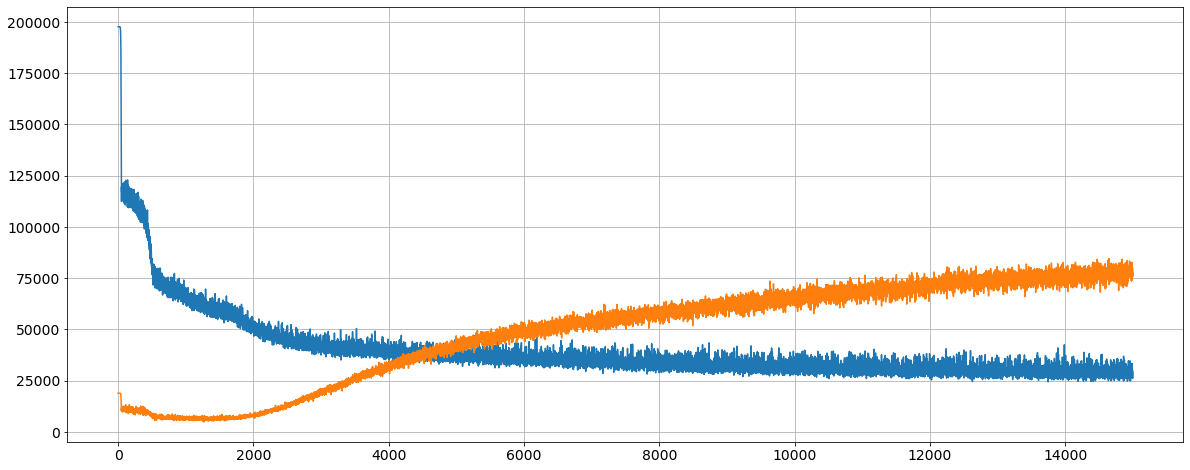

In [28]:
plt.figure(figsize=(20, 8))
plt.grid(True)
plt.plot(range(len(global_train_loss)), global_train_loss)
plt.plot(range(len(test_loss)), test_loss)

In [212]:
def predict_and_save(model, dataset):
    prediction = model(torch.tensor(dataset.values,dtype=torch.float32).to(device=device)).cpu().detach().numpy()
    current_submission = pd.DataFrame(id_for_pred)
    current_submission['SalePrice'] = prediction
    current_submission.to_csv('G:/data/HousePrices/submission.csv', index=False)

In [213]:
# predict_and_save(model, for_prediction_dataset)